# 얼굴 이미지 인식

In [4]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

### 사진

300 209


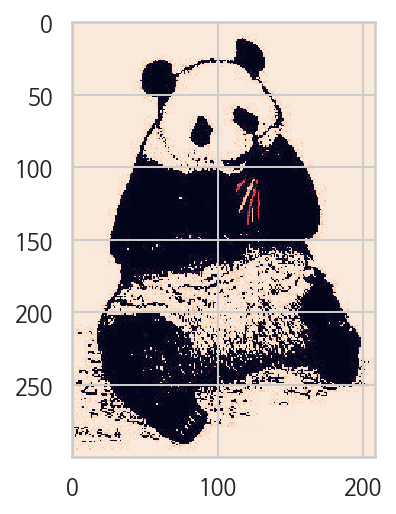

In [5]:
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
cv2.waitKey(0)
height, width = img.shape
print(height, width)

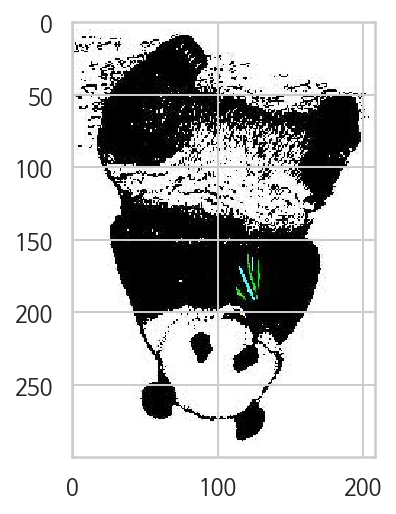

In [6]:
# 상하반전
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_ANYCOLOR)
dst = cv2.flip(img, 0)
plt.imshow(dst)

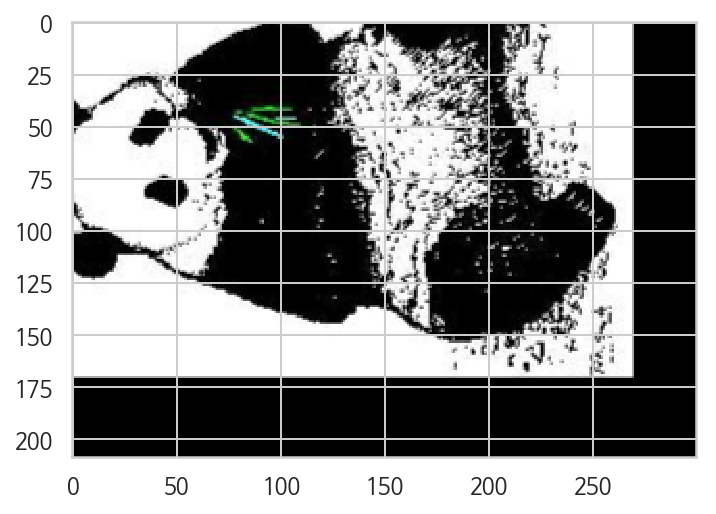

In [17]:
# 로테이션
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_ANYCOLOR)
height, width, channel = img.shape
matrix = cv2.getRotationMatrix2D((width/3,height/3), 90, 1)
dst = cv2.warpAffine(img, matrix, (height, width))
plt.imshow(dst)

-1

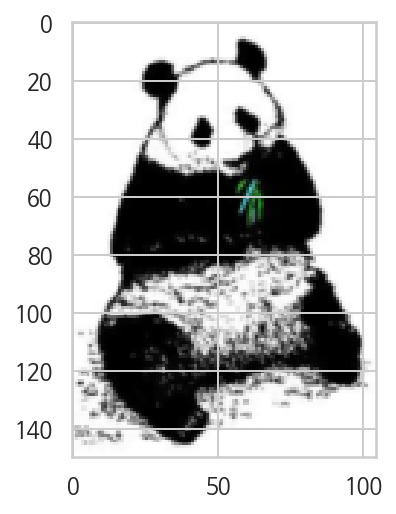

In [18]:
# 확대 축소
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_ANYCOLOR)
height, width, channel = img.shape
dst = cv2.pyrUp(img, dstsize=(width*2,height*2), borderType=cv2.BORDER_DEFAULT)
dst2 = cv2.pyrDown(img)
plt.imshow(img)
plt.imshow(dst)
plt.imshow(dst2)
cv2.waitKey(0)

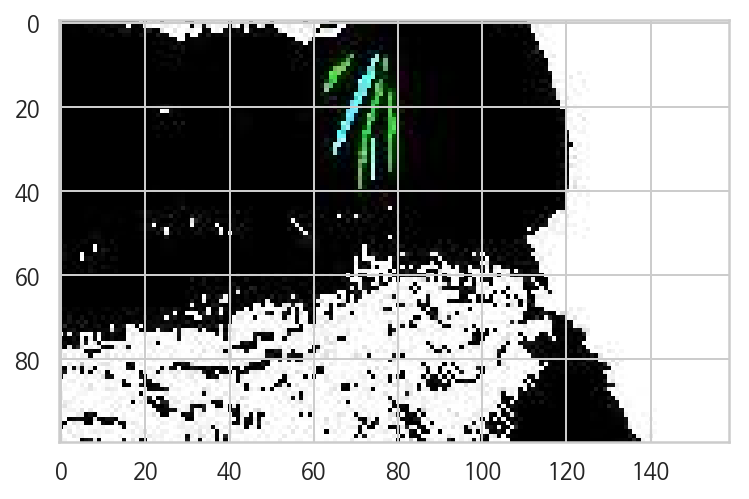

In [20]:
# 이미지 자르기
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_ANYCOLOR)
dst = img.copy()
dst = img[100:200, 50:500]
plt.imshow(dst)

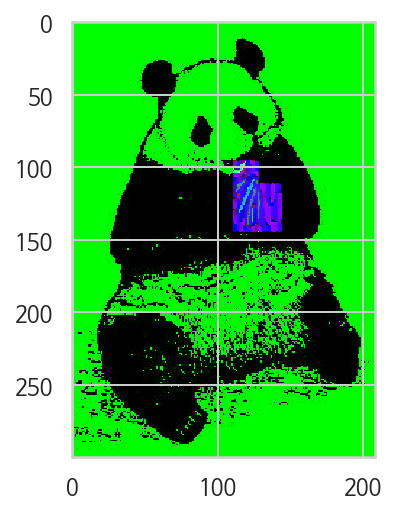

In [24]:
# 컬러 설정
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_ANYCOLOR)
dst = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(dst)

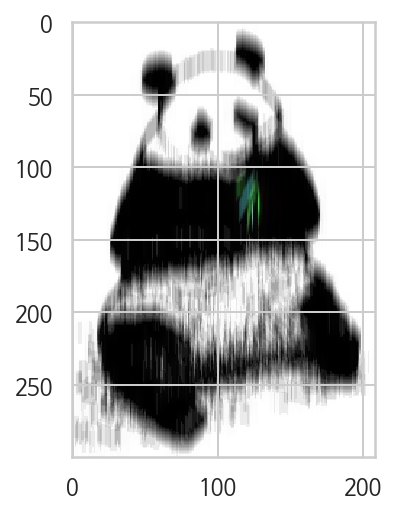

In [30]:
img = cv2.imread("/Users/lesson6_mac/AtomData/python/photo/panda.jpg", cv2.IMREAD_ANYCOLOR)
dst = cv2.blur(img, (1,15), anchor= (-1, -1), borderType=cv2.BORDER_DEFAULT)
plt.imshow(dst)

### 카메라

In [ ]:
import cv2
capture = cv2.VideoCapture(0) 
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640) 
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480) 
while True:
    ret, frame = capture.read() 
    cv2.imshow("VideoFrame", frame) 
    if cv2.waitKey(1) > 0:
        break
capture.release( )

### 동영상

In [ ]:
vid = cv2.VideoCapture('/Users/lesson6_mac/AtomData/python/photo/movie.mp4')
while True:
    if(vid.get(cv2.CAP_PROP_POS_FRAMES) == vid.get(cv2.CAP_PROP_FRAME_COUNT)):
        vid.open("./photo/movie.mp4")
    ret, frame = vid.read()
    cv2.imshow('dd', frame)
    if cv2.waitKey(33) > 0:
        break
capture.release()

### 글자 인식

In [31]:
from PIL import Image
import pytesseract

In [ ]:
# windows 사용자는 필요한 설정
# pytesseract.pytesseract.tesseract_cmd = '설치된 경로'

In [35]:
def ocr(file, lang='eng'):
    img = Image.open(file)
    text = pytesseract.pytesseract.image_to_string(img, lang = lang)
    print(text)
ocr('./img/20190723_100232.png')
# ocr('./img/20190723_120130.png', lang='kor')

Existing System

The existing tesseract-OCR supports English language as
default and also supports languages like Dutch, Spanish, Italian,
French and German. All these languages are trained to
tesseract OCR, but languages like Tamil, Malayalam are not
much trained to OCR. There are no GUI available for tesseract
in tamil and training tesseract is a big task which an
intermediate persons too feel complex for training it. Since
Tesseract OCR Engine is command line Tool, usage of OCR is
much less.


In [36]:
ocr('/Users/lesson6_mac/AtomData/python/img/MGNDM.png')

Figure 4

Answer € 0
v
Column € 8

 

 

 

 

 

 

 
 

OUTPUT "Enter bit value: "

   

1

 

Answer <€ Answer + (Column * Bit)

 

 

 

¥

Column <€ Column/2

 

 

 

 

No

 

Column < 1?

 

Yes

OUTPUT "Decimal value is: "
OUTPUT Answer


### 얼굴인식

[[402 479 354 354]]


<IPython.core.display.Javascript object>


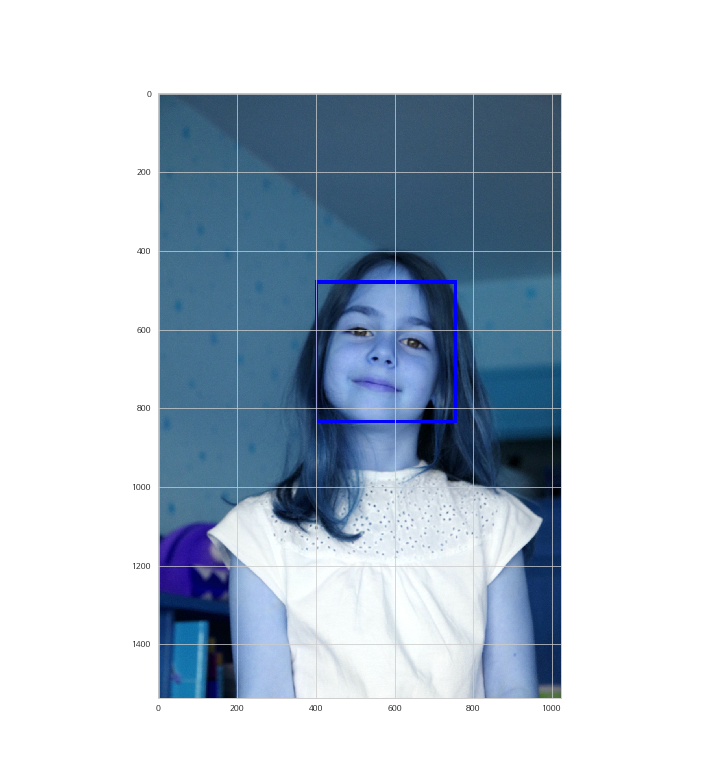

In [1]:
import cv2
import sys
image_file = "./photo/face1.jpg"
cascade_file = "./photo/haarcascade_frontalface_alt.xml"
image = cv2.imread(image_file)
# 얼굴을 인식할 때는 얼굴 인식 전용 캐스케이드 파일을 지정한다.
# 그레이스케일로 변환한다.
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
# 얼굴 인식 전용 캐스케이드 파일을 읽어 들이고 얼굴을 인식한다.
cascade = cv2.CascadeClassifier(cascade_file)
# 얼굴 인식을 실행한다.
face_list = cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=1, minSize=(100,100))
if len(face_list) > 0:
    # 얼굴에 인식한 범위 좌표에 사각형으로 표시한다.
    print(face_list)
    color = (0, 0, 255) 
    for face in face_list:
        x,y,w,h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=8) 
    cv2.imwrite("./photo/facedetect-output.png", image)
    plt.imshow(cv2.imread("./photo/facedetect-output.png"))
else:
    print("no face")